In [1]:
%matplotlib inline

import os
import sys
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

import glob
import uproot

# Kernel = Minuitenv, DataSc



In [2]:
# t = uproot.concatenate('build/output*.root:truth',  library="pd", num_workers=10) #filter_name=cols
# print(t.shape)
# with uproot.recreate('output_40k_./s  5MeV.root') as file:
#     file['truth'] = t
# t.columns

In [3]:
t = uproot.concatenate('build/output*.root:truth',  library="pd", num_workers=10) #filter_name=cols

In [4]:
t.keys()

Index(['event', 'gen_PDGcode', 'gen_PDGmass', 'gen_charge', 'gen_p', 'gen_px',
       'gen_py', 'gen_pz', 'gen_Ekin', 'nParticles', 'nPrimary', 'nGammas',
       'nOptPhotons', 'nScintPhotons', 'Edep', 'FlightDistance',
       'neutronExit_px', 'neutronExit_py', 'neutronExit_pz', 'neutronExit_E',
       'EdepPrimary'],
      dtype='object')

In [7]:
file = uproot.open(f"build/output_r0.root")
file.keys()
# file['hits per event'].to_hist().plot()


['truth;1', 'Wavelength;1']

In [12]:
# h = file['Wavelength'].to_hist()

AttributeError: 'Hist' object has no attribute 'GetEntries'

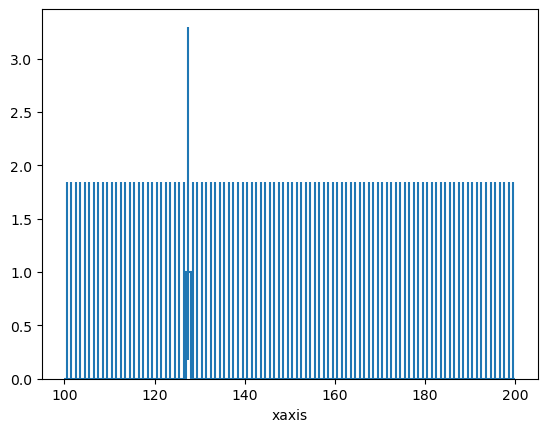

In [10]:
file['Wavelength'].to_hist().plot();

In [104]:
# t = uproot.concatenate('build/output*.root:truth',  library="pd", num_workers=10) #filter_name=cols
# print(t.shape)
# with uproot.recreate('output_40k_./s  5MeV.root') as file:
#     file['truth'] = t
# t.columns

(10000, 21)


Index(['event', 'gen_PDGcode', 'gen_PDGmass', 'gen_charge', 'gen_p', 'gen_px',
       'gen_py', 'gen_pz', 'gen_Ekin', 'nParticles', 'nPrimary', 'nGammas',
       'nOptPhotons', 'nScintPhotons', 'Edep', 'FlightDistance',
       'neutronExit_px', 'neutronExit_py', 'neutronExit_pz', 'neutronExit_E',
       'EdepPrimary'],
      dtype='object')

In [114]:
def read_file(file, tree='truth'):
    t = uproot.concatenate(f'{file}:{tree}',  library="pd", num_workers=10) #filter_name=cols
    t['nPhotonsPerMeV'] = t.nScintPhotons/t.Edep
    t['neutronIN_theta'] = np.arccos(t.gen_px / t.gen_p)
    t['neutronIN_phi']   = np.arctan2(t.gen_pz, t.gen_py)

    t['neutronOUT_p']     = np.sqrt(t.neutronExit_px**2 + t.neutronExit_py**2 + t.neutronExit_pz**2)
    t['neutronOUT_theta'] = np.arccos(t.neutronExit_px / t.neutronOUT_p)
    t['neutronOUT_phi']   = np.arctan2(t.neutronExit_pz, t.neutronExit_py)

    t.sort_values(by=['event'], inplace = True)
    t.reset_index(drop=True, inplace = True)

    print(file, t.shape)
    return t

In [117]:
t = read_file(file='output_40k_2.45MeV.root', tree='truth')
t2 = read_file(file='output_40k_25MeV.root', tree='truth')

output_40k_2.45MeV.root (10000, 28)
output_40k_25MeV.root (10000, 28)


In [118]:
# # t = uproot.concatenate('output_40k_2.45MeV.root:truth',  library="pd", num_workers=10) #filter_name=cols
# t = uproot.concatenate('output_40k_25MeV.root:truth',  library="pd", num_workers=10) #filter_name=cols
# t['nPhotonsPerMeV'] = t.nScintPhotons/t.Edep
# t['neutronIN_theta'] = np.arccos(t.gen_px / t.gen_p)
# t['neutronIN_phi']   = np.arctan2(t.gen_pz, t.gen_py)

# t['neutronOUT_p']     = np.sqrt(t.neutronExit_px**2 + t.neutronExit_py**2 + t.neutronExit_pz**2)
# t['neutronOUT_theta'] = np.arccos(t.neutronExit_px / t.neutronOUT_p)
# t['neutronOUT_phi']   = np.arctan2(t.neutronExit_pz, t.neutronExit_py)

# print(t.shape)

# # print(f'mean number of photons per MeV deposited: {t.nPhotonsPerMeV.mean():.1f} ± {t.nPhotonsPerMeV.std():.1f} ')

# print()
# print(t.columns)
# t.sort_values(by=['event'], inplace = True)
# t.reset_index(drop=True, inplace = True)
# 2.45
# # with uproot.recreate('output_40k.root') as file:
# #     file['truth'] = t
# # t


In [119]:
cols = ['event', 'gen_PDGcode', 'gen_PDGmass', 'gen_charge', 'gen_p', 'gen_px',
       'gen_py', 'gen_pz', 'gen_Ekin', 'nScintPhotons', 'Edep', 'FlightDistance',
       'neutronExit_px', 'neutronExit_py', 'neutronExit_pz', 'neutronExit_E',
       'EdepPrimary', 'neutronIN_theta', 'neutronIN_phi']
t.loc[:,cols].head()

,event,gen_PDGcode,gen_PDGmass,gen_charge,gen_p,gen_px,gen_py,gen_pz,gen_Ekin,nScintPhotons,Edep,FlightDistance,neutronExit_px,neutronExit_py,neutronExit_pz,neutronExit_E,EdepPrimary,neutronIN_theta,neutronIN_phi
0,0,2112,939.56536,0,67.896044,67.896044,0.0,0.0,2.45,14471,1.424336,3970.616072,-38.049729,23.901918,-9.994202,940.692316,0.204364,0.0,0.0
1,1,2112,939.56536,0,67.896044,67.896044,0.0,0.0,2.45,54724,1.929847,4924.000377,35.232089,16.505769,2.673578,940.374369,0.101192,0.0,0.0
2,2,2112,939.56536,0,67.896044,67.896044,0.0,0.0,2.45,70641,2.041113,3797.288028,-9.212587,-9.317663,31.752050,940.193038,0.119742,0.0,0.0
3,3,2112,939.56536,0,67.896044,67.896044,0.0,0.0,2.45,8838,0.902442,4322.685706,28.422029,-30.108161,36.229752,941.174784,0.167117,0.0,0.0
4,4,2112,939.56536,0,67.896044,67.896044,0.0,0.0,2.45,59062,1.573373,4153.285419,2.806017,-2.679463,-36.445838,940.279968,0.018481,0.0,0.0


mean number of photons per MeV deposited: 26326.2 ± 16098.5 


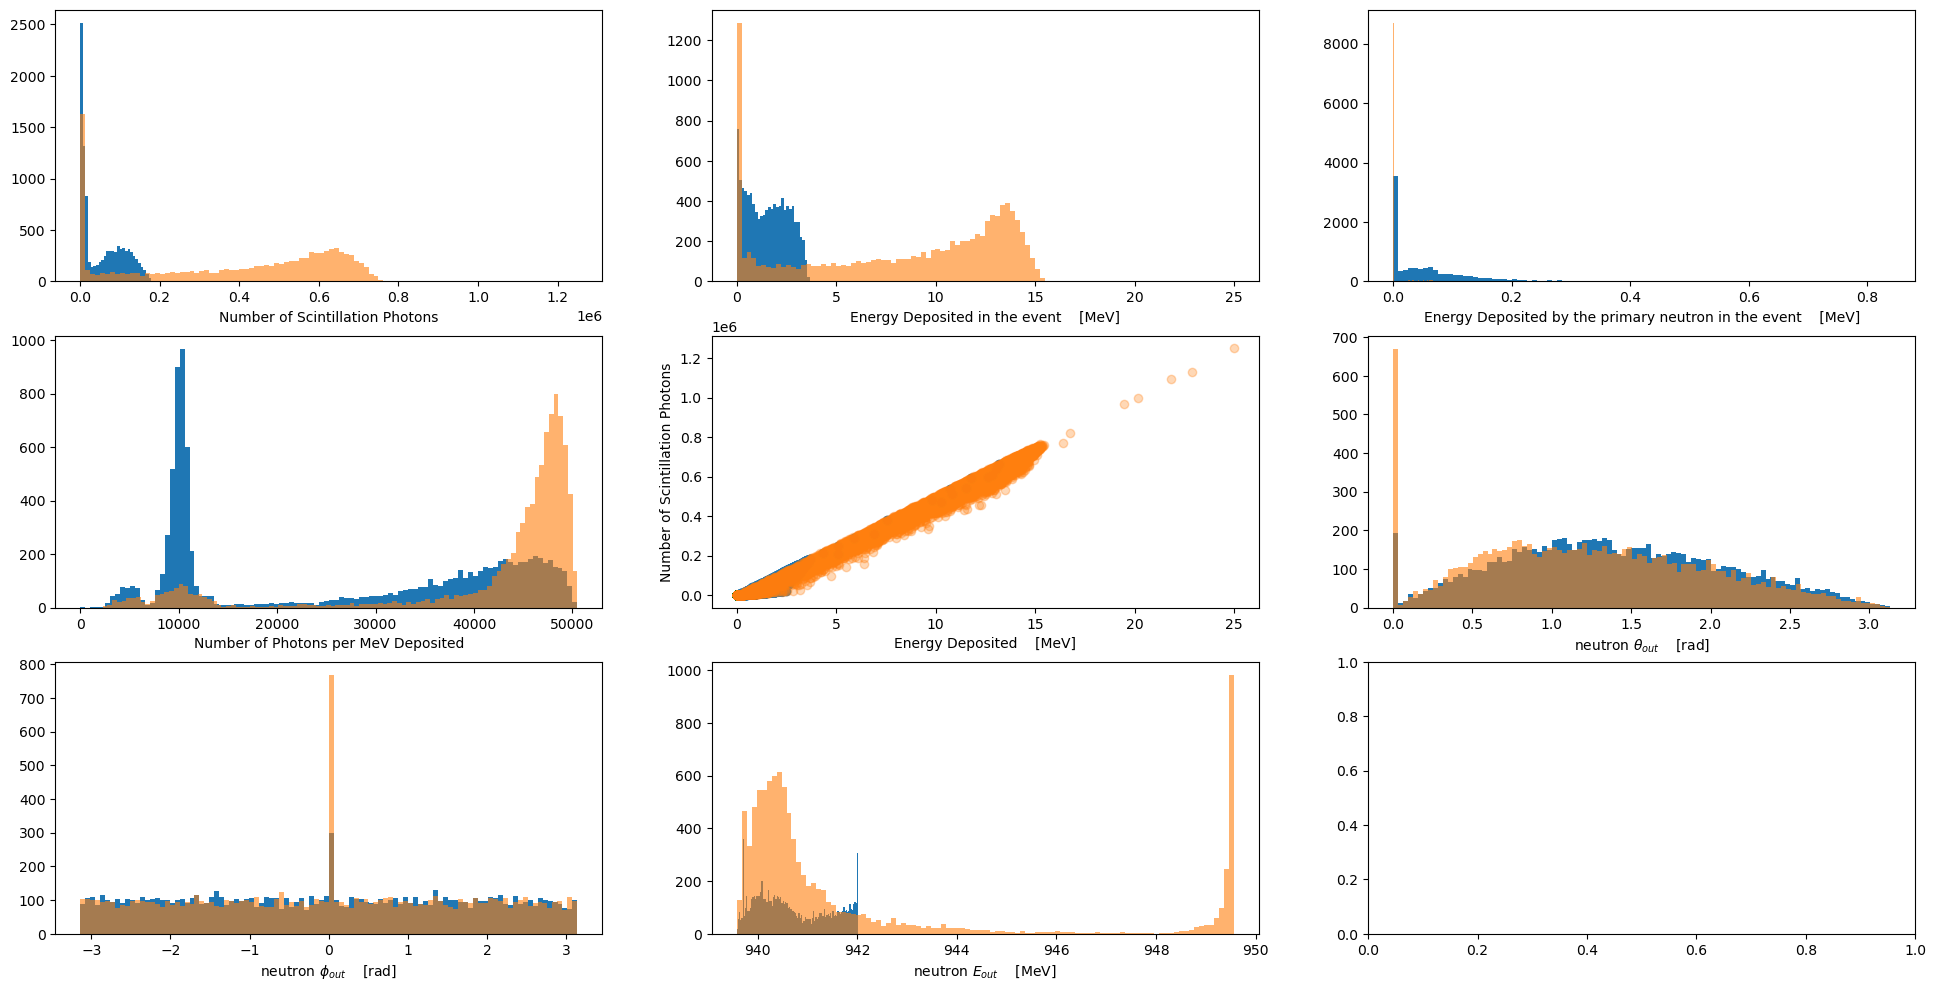

In [125]:
nrows, ncols = 3, 3
fig, axs = plt.subplots(nrows, ncols, figsize=(ncols*8, nrows*4))

i = 0
ax = axs.flatten()[i]
ax.hist(t.nScintPhotons, bins=100);
ax.hist(t2.nScintPhotons, bins=100, alpha=0.6);
ax.set_xlabel("Number of Scintillation Photons");

i+=1
ax = axs.flatten()[i]
ax.hist(t.Edep, bins=100);
ax.hist(t2.Edep, bins=100, alpha=0.6);
ax.set_xlabel("Energy Deposited in the event    [MeV]");

i+=1
ax = axs.flatten()[i]
ax.hist(t.EdepPrimary, bins=100);
ax.hist(t2.EdepPrimary, bins=100, alpha=0.6);
ax.set_xlabel("Energy Deposited by the primary neutron in the event    [MeV]");

i+=1
ax = axs.flatten()[i]
ax.hist(t.nPhotonsPerMeV, bins=100);
ax.hist(t2.nPhotonsPerMeV, bins=100, alpha=0.6);
ax.set_xlabel("Number of Photons per MeV Deposited")
print(f'mean number of photons per MeV deposited: {t.nPhotonsPerMeV.mean():.1f} ± {t.nPhotonsPerMeV.std():.1f} ');

i+=1
ax = axs.flatten()[i]
ax.scatter(t.Edep, t.nScintPhotons);
ax.scatter(t2.Edep, t2.nScintPhotons, alpha=0.3);
ax.set_xlabel("Energy Deposited    [MeV]");
ax.set_ylabel("Number of Scintillation Photons");

i+=1
ax = axs.flatten()[i]
ax.hist(t.neutronOUT_theta, bins=100);
ax.hist(t2.neutronOUT_theta, bins=100, alpha=0.6);
ax.set_xlabel(r"neutron $\theta_{out}$    [rad]");

i+=1
ax = axs.flatten()[i]
ax.hist(t.neutronOUT_phi, bins=100);
ax.hist(t2.neutronOUT_phi, bins=100, alpha=0.6);
ax.set_xlabel(r"neutron $\phi_{out}$    [rad]");

i+=1
ax = axs.flatten()[i]
ax.hist(t.neutronExit_E, bins=100);
ax.hist(t2.neutronExit_E, bins=100, alpha=0.6);
ax.set_xlabel(r"neutron $E_{out}$    [MeV]");

# i+=1
# ax = axs.flatten()[i]
# ax.scatter(t.neutronOUT_theta, t.neutronExit_E);
# ax.set_xlabel(r"neutron $\theta_{out}$    [rad]");
# ax.set_ylabel("Number of Scintillation Photons");

# i+=1
# ax = axs.flatten()[i]
# ax.scatter(t.neutronOUT_phi, t.neutronExit_E);
# ax.set_xlabel(r"neutron $\phi_{out}$    [rad]");
# ax.set_ylabel("Number of Scintillation Photons");

In [126]:
def plot_average_inBinsOf(var_to_bin, var_to_avg, nbins):
    # Define the bins
    bins = np.linspace(min(var_to_bin), max(var_to_bin), nbins)

    # Calculate the mean for each bin of Edep
    digitized = np.digitize(var_to_bin, bins)
    bin_means = [var_to_avg[digitized == i].mean() for i in range(1, len(bins))]
    # # Standard deviation as error
    bin_stds  = [var_to_avg[digitized == i].std()  for i in range(1, len(bins))]  
    # Poisson error
    # bin_stds  = [np.sqrt(digitized[i]) for i in range(1, len(bins))]  

    # Plot the binned averages
    bin_centers = 0.5 * (bins[1:] + bins[:-1])  # Get the bin centers
    # plt.plot(bin_centers, bin_means, marker='o', linestyle='-')
    plt.errorbar(bin_centers, bin_means, yerr=bin_stds, fmt='o', linestyle='-', capsize=3, label='Binned Averages')


    # Adding labels and title
    plt.xlabel(f"{var_to_bin.name}")
    plt.ylabel(f"Averaged {var_to_avg.name}")
    plt.title(f"Averagef {var_to_avg.name} vs Binned {var_to_bin.name}")

    # Display the plot
    plt.show()


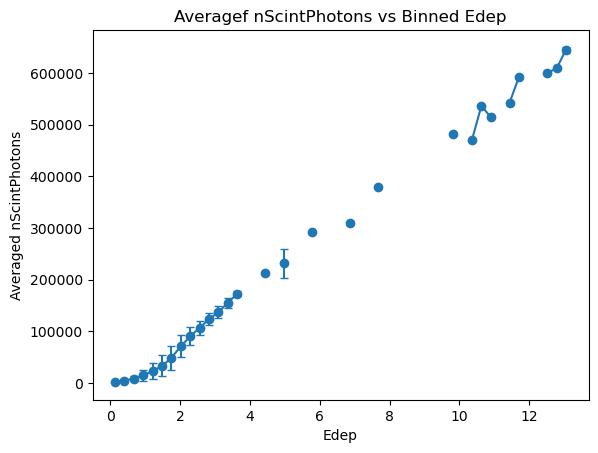

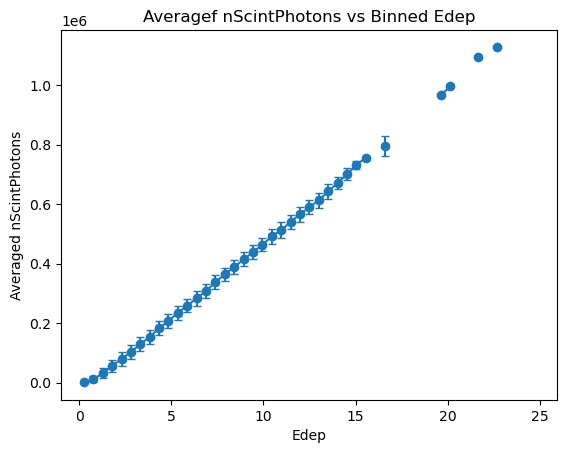

In [127]:
nbins = 50
var_to_bin = t.Edep
var_to_avg = t.nScintPhotons
plot_average_inBinsOf(var_to_bin, var_to_avg, nbins)
var_to_bin = t2.Edep
var_to_avg = t2.nScintPhotons
plot_average_inBinsOf(var_to_bin, var_to_avg, nbins)

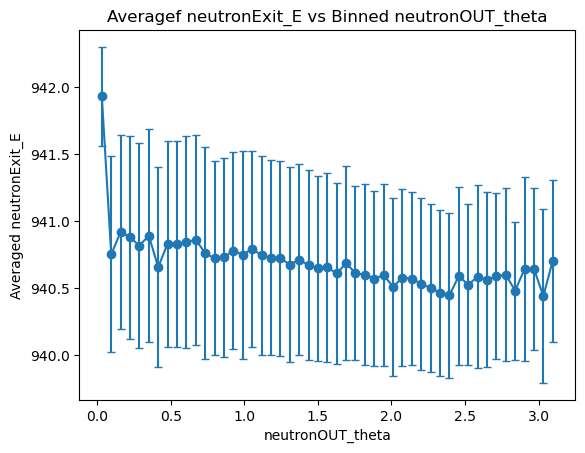

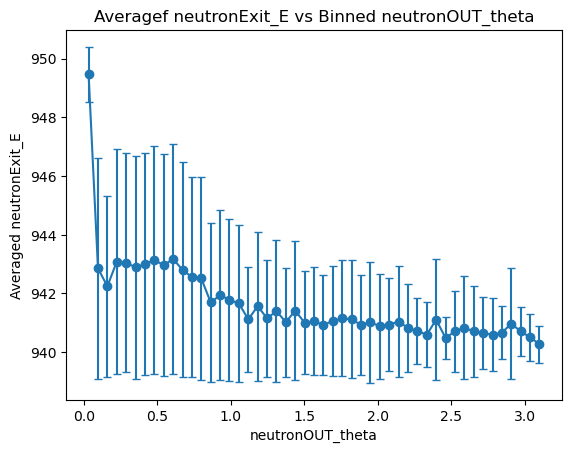

In [128]:
nbins = 50
# cut = f'{np.pi}>neutronOUT_phi>0'
# var_to_bin = t.query(cut).neutronOUT_theta
# var_to_avg = t.query(cut).nScintPhotons
var_to_bin = t.neutronOUT_theta
var_to_avg = t.neutronExit_E
plot_average_inBinsOf(var_to_bin, var_to_avg, nbins)
var_to_bin = t2.neutronOUT_theta
var_to_avg = t2.neutronExit_E
plot_average_inBinsOf(var_to_bin, var_to_avg, nbins)

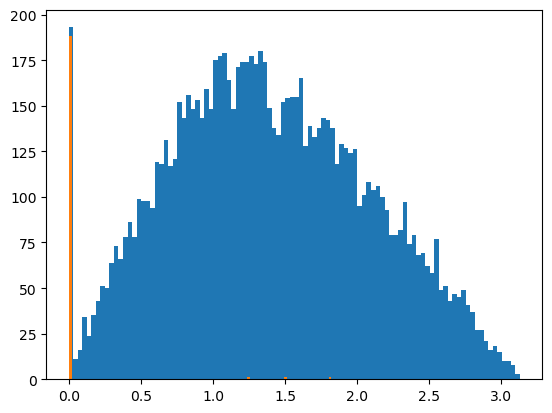

In [129]:
cut = f'0.001>neutronOUT_phi>-0.001'
plt.hist(t.neutronOUT_theta, bins=100);
plt.hist(t.query(cut).neutronOUT_theta, bins=100);


In [130]:
# nbins = 50
# var_to_bin = t.neutronOUT_theta
# var_to_avg = t.neutronOUT_phi
# plot_average_inBinsOf(var_to_bin, var_to_avg, nbins)

In [131]:
# nbins = 50
# var_to_avg = t.neutronOUT_theta
# var_to_bin = t.neutronOUT_phi
# plot_average_inBinsOf(var_to_bin, var_to_avg, nbins)

$$T_{nr} \approx \frac{2 T_n A}{1+A^2}(1-\cos \theta)$$

$A = 40$

$T_n = 2.45 \, \mathrm{MeV}, 25\, \mathrm{MeV}...$